### Tree Structured Machine Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [2]:
state = 10

### Regression

In [3]:
df = pd.read_csv(r'Datasets/movie_regression.csv')

In [4]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400


In [5]:
print('(rows, columns) :', df.shape)

(rows, columns) : (506, 18)


In [6]:
for i in df.columns:
    print(i)

Marketing expense
Production expense
Multiplex coverage
Budget
Movie_length
Lead_ Actor_Rating
Lead_Actress_rating
Director_rating
Producer_rating
Critic_rating
Trailer_views
3D_available
Time_taken
Twitter_hastags
Genre
Avg_age_actors
Num_multiplex
Collection


In [7]:
# missing values in Time_taken
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [8]:
df['Time_taken'].head()

0    109.60
1    146.64
2    147.88
3    185.36
4    176.48
Name: Time_taken, dtype: float64

In [9]:
value = round(df['Time_taken'].mean(),2)
print(value)

157.39


In [10]:
df.Time_taken = df.Time_taken.fillna(value)

In [11]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400


In [12]:
# one-hot encoding for categorical data
df = pd.get_dummies(df, columns=['Genre','3D_available'], drop_first=True)

In [13]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Genre_Comedy,Genre_Drama,Genre_Thriller,3D_available_YES
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,0,0,1,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,0,1,0,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,1,0,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,0,1,0,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,0,1,0,0


In [14]:
df = df.rename(columns={'3D_available_YES':'3D_available'})

In [15]:
# Data split
X = df.drop(columns='Collection')
Y = df['Collection']

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size=0.2, 
                                                    random_state=state)

In [17]:
# created decision tree model for regression
reg = DecisionTreeRegressor(random_state=state).fit(X_train,Y_train)

In [18]:
# mean squared error
mse_train = mean_squared_error(Y_train, reg.predict(X_train))
mse_test = mean_squared_error(Y_test, reg.predict(X_test))
print('mse train:', round(mse_train, 3))
print('mse test:', round(mse_test, 3))

mse train: 0.0
mse test: 191764313.725


In [19]:
# r^2 score, model fit data
print('r2 score train:', round(reg.score(X_train, Y_train)*100, 2))
print('r2 score test:', round(reg.score(X_test, Y_test)*100,2))

r2 score train: 100.0
r2 score test: 53.85


In [20]:
# full grown regression tree [overfit]
# plt.figure(figsize=(30,15))
# plot_tree(reg, filled=True, feature_names=X_train.columns, rounded=True, fontsize=17)
# plt.show()

### Pre-Pruning [model hyperparameters]

In [21]:
print('tree depth:', reg.get_depth())

tree depth: 17


In [22]:
estimator = DecisionTreeRegressor(random_state=state)
depth = np.arange(5,15)
sample = np.arange(2,15)
params = {'max_depth': depth, 'min_samples_split': sample}

gridsearch = GridSearchCV(estimator=estimator, 
                          param_grid=params, 
                          cv=5).fit(X_train, Y_train)

In [23]:
gridsearch.best_params_

{'max_depth': 8, 'min_samples_split': 9}

In [24]:
prereg = gridsearch.best_estimator_

In [25]:
mse_train = mean_squared_error(Y_train, prereg.predict(X_train))
mse_test = mean_squared_error(Y_test, prereg.predict(X_test))
print('mse train:', mse_train)
print('mse test:', mse_test)

mse train: 10170295.526977573
mse test: 75143568.10513893


In [26]:
print('r2 score train:', round(prereg.score(X_train, Y_train)*100, 2))
print('r2 score test:', round(prereg.score(X_test, Y_test)*100,2))

r2 score train: 96.7
r2 score test: 81.91


In [27]:
# pre pruned regression tree
# plt.figure(figsize=(30,15))
# plot_tree(prereg, filled=True, feature_names=X_train.columns, rounded=True, fontsize=17)
# plt.show()

### Post-Pruning [Cost Complexity Pruning ]

In [28]:
reg = DecisionTreeRegressor(random_state=state)
path = reg.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [29]:
ccp_alphas = ccp_alphas[:-1]
impurities = impurities[:-1]

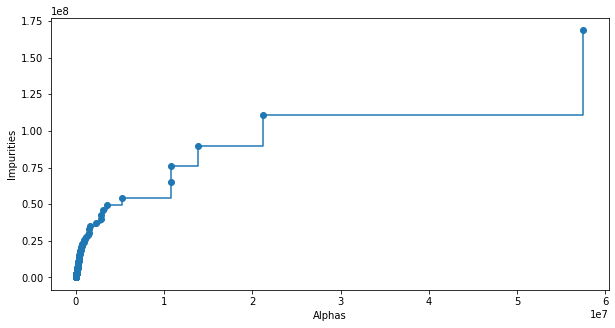

In [30]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas, impurities, marker="o", drawstyle="steps-post")
ax.set_xlabel("Alphas")
ax.set_ylabel("Impurities")
plt.show()

In [31]:
regs = []
for ccp_alpha in ccp_alphas:
    reg = DecisionTreeRegressor(ccp_alpha=ccp_alpha, random_state=state)
    reg.fit(X_train, Y_train)
    regs.append(reg)

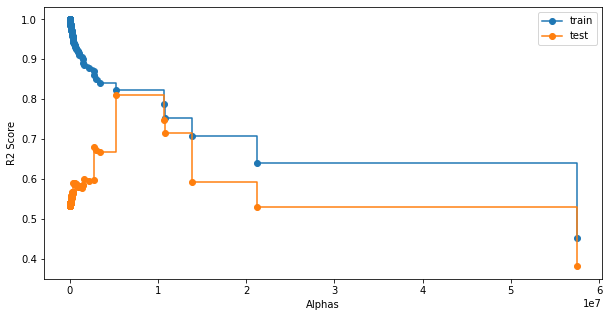

In [32]:
train_scores = [reg.score(X_train, Y_train) for reg in regs]
test_scores = [reg.score(X_test, Y_test) for reg in regs]

fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("Alphas")
ax.set_ylabel("R2 Score")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [33]:
# find best alpha
best_alpha_index = np.argmax(test_scores)
best_alpha = ccp_alphas[best_alpha_index]
print('best alpha:', best_alpha)

best alpha: 5246380.9275663905


In [34]:
postreg = DecisionTreeRegressor(ccp_alpha=best_alpha, random_state=state).fit(X_train, Y_train)

In [35]:
mse_train = mean_squared_error(Y_train, postreg.predict(X_train))
mse_test = mean_squared_error(Y_test, postreg.predict(X_test))
print('mse train:', mse_train)
print('mse test:', mse_test)

mse train: 54513946.239880875
mse test: 78958014.46304192


In [36]:
print('r2 score train:', round(postreg.score(X_train, Y_train)*100, 2))
print('r2 score test:', round(postreg.score(X_test, Y_test)*100,2))

r2 score train: 82.29
r2 score test: 81.0


In [37]:
# grid search to find best alpha
estimator = DecisionTreeRegressor(random_state=state)
params = {'ccp_alpha': ccp_alphas}
gridsearch = GridSearchCV(estimator=estimator, 
                          param_grid=params, 
                          cv=5).fit(X_train, Y_train)

In [38]:
print('old best alpha:', best_alpha)
print('new best alpha:', gridsearch.best_params_['ccp_alpha'])

old best alpha: 5246380.9275663905
new best alpha: 5246380.9275663905


In [39]:
post_reg = gridsearch.best_estimator_

In [40]:
mse_train = mean_squared_error(Y_train, post_reg.predict(X_train))
mse_test = mean_squared_error(Y_test, post_reg.predict(X_test))
print('mse train:', mse_train)
print('mse test:', mse_test)

mse train: 54513946.239880875
mse test: 78958014.46304192


In [41]:
print('r2 score train:', round(post_reg.score(X_train, Y_train)*100, 2))
print('r2 score test:', round(post_reg.score(X_test, Y_test)*100,2))

r2 score train: 82.29
r2 score test: 81.0


In [42]:
# post pruned regression tree
# plt.figure(figsize=(30,15))
# plot_tree(postreg_, filled=True, feature_names=X_train.columns, rounded=True, fontsize=17)
# plt.show()

### Classification

In [43]:
df2 = pd.read_csv(r'Datasets/movie_classification.csv')

In [44]:
df2.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [45]:
df2 = df2.rename(columns={'Lead_ Actor_Rating': 'Lead_Actor_Rating'})

In [46]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_Actor_Rating    506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [47]:
mean = round(df2['Time_taken'].mean(), 2)

In [48]:
df2['Time_taken'] = df2['Time_taken'].fillna(mean)

In [49]:
df2['Start_Tech_Oscar'].value_counts()

1    276
0    230
Name: Start_Tech_Oscar, dtype: int64

In [50]:
df2 = pd.get_dummies(df2, columns=['3D_available', 'Genre'], drop_first=True)

In [51]:
X = df2.drop(columns=['Start_Tech_Oscar'])
Y = df2['Start_Tech_Oscar']

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=state)

In [53]:
clf = DecisionTreeClassifier(random_state=state).fit(X_train,Y_train)

In [54]:
test_matrix = confusion_matrix(Y_test, clf.predict(X_test))
train_matrix = confusion_matrix(Y_train, clf.predict(X_train))

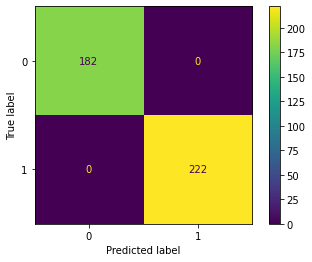

In [55]:
ConfusionMatrixDisplay(train_matrix).plot()
plt.show()

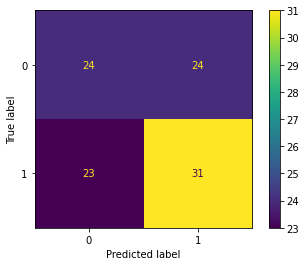

In [56]:
ConfusionMatrixDisplay(test_matrix).plot()
plt.show()

In [57]:
print('accuracy train:', round(clf.score(X_train, Y_train)*100, 2))
print('accuracy test:', round(clf.score(X_test, Y_test)*100, 2))

accuracy train: 100.0
accuracy test: 53.92


### Pre-Pruning

In [58]:
print('total columns:', len(X_train.columns))
print('above clf depth:', clf.get_depth())

total columns: 20
above clf depth: 16


In [59]:
estimator = DecisionTreeClassifier(random_state=state)
depth = np.arange(5, 15)
samples = np.arange(2,15)
params = {'max_depth':depth, 'min_samples_split':samples}

gridsearch = GridSearchCV(estimator=estimator, 
                          param_grid=params, 
                          cv=5).fit(X_train, Y_train)

In [60]:
gridsearch.best_params_

{'max_depth': 11, 'min_samples_split': 9}

In [61]:
maxdepth = gridsearch.best_params_['max_depth']
minsamplesplit = gridsearch.best_params_['min_samples_split']

In [62]:
preclf = gridsearch.best_estimator_

In [63]:
print('accuracy train:', round(preclf.score(X_train, Y_train)*100, 2))
print('accuracy test:', round(preclf.score(X_test, Y_test)*100, 2))

accuracy train: 87.87
accuracy test: 51.96


###  Post-Pruning [Cost-Complexity Pruning]

In [64]:
clf = DecisionTreeClassifier(random_state=state)
path = clf.cost_complexity_pruning_path(X_train, Y_train)

In [65]:
ccp_alphas = path.ccp_alphas[:-1]

In [66]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=state)
    clf.fit(X_train, Y_train)
    clfs.append(clf)

In [67]:
train_scores = [clf.score(X_train, Y_train) for clf in clfs]
test_scores = [clf.score(X_test, Y_test) for clf in clfs]

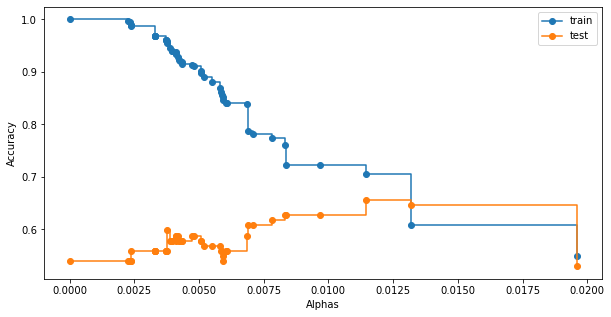

In [68]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("Alphas")
ax.set_ylabel("Accuracy")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [69]:
print('max test accuracy:', round(max(test_scores)*100,2))

max test accuracy: 65.69


In [70]:
best_alpha_index = np.argmax(test_scores)
best_alpha_index

47

In [71]:
best_alpha = ccp_alphas[best_alpha_index]
best_alpha

0.011457817323425941

In [72]:
postclf = DecisionTreeClassifier(ccp_alpha=best_alpha, random_state=state).fit(X_train, Y_train)

In [73]:
print('accuracy train:', round(postclf.score(X_train, Y_train)*100, 2))
print('accuracy test:', round(postclf.score(X_test, Y_test)*100, 2))

accuracy train: 70.54
accuracy test: 65.69


In [74]:
estimator = DecisionTreeClassifier(random_state=state)
params = {'ccp_alpha':ccp_alphas}
gridsearch = GridSearchCV(estimator=estimator, 
                          param_grid=params, 
                          cv=5).fit(X_train, Y_train)

In [75]:
gridsearch.best_params_

{'ccp_alpha': 0.009676028429065772}

In [76]:
new_alpha = gridsearch.best_params_['ccp_alpha']

In [77]:
postclf = gridsearch.best_estimator_

In [78]:
print('accuracy train:', round(postclf.score(X_train, Y_train)*100, 2))
print('accuracy test:', round(postclf.score(X_test, Y_test)*100, 2))

accuracy train: 72.28
accuracy test: 62.75


In [79]:
# post pruned classification tree
# plt.figure(figsize=(30,15))
# plot_tree(post_clf, filled=True, feature_names=X_train.columns, rounded=True, fontsize=20)
# plt.show()

### Ensemble Learning

#### Voting

In [80]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import VotingClassifier

In [81]:
# this is only an example, various ml models should be used for ensemble learning.
# goal of ensemble learning is to reduce variance.
# same models do no reduce variance to a significant level, diversity does.

In [82]:
# model1 = LogisticRegression(random_state=0)
# model2 = LogisticRegression(random_state=1)
# model3 = LogisticRegression(random_state=2)

# estimators = [('lr1', model1), ('lr2', model1), ('lr3', model1)]
# ens = VotingClassifier(estimators=estimators, voting='hard').fit(X_train, Y_train)

# print('accuracy train:', round(accuracy_score(Y_train, ens.predict(X_train))*100, 2))
# print('accuracy test:', round(accuracy_score(Y_test, ens.predict(X_test))*100, 2))

#### Averaging

In [83]:
# model1 = LinearRegression(random_state=0).fit(X_train, Y_train)
# model2 = LinearRegression(random_state=1).fit(X_train, Y_train)
# model3 = LinearRegression(random_state=2).fit(X_train, Y_train)

# pred1 = model1.predict(X_test)
# pred2 = model2.predict(X_test)
# pred3 = model3.predict(X_test)

# pred = (pred1 + pred2 + pred3)/3
# print('test mse:', mean_squared_error(Y_test, pred))

#### Bagging

In [84]:
estimator = DecisionTreeClassifier()
bagclf = BaggingClassifier(base_estimator=estimator, random_state=state).fit(X_train, Y_train)

In [85]:
print('accuracy train:', round(bagclf.score(X_train, Y_train)*100, 2))
print('accuracy test:', round(bagclf.score(X_test, Y_test)*100, 2))

accuracy train: 98.76
accuracy test: 67.65


In [86]:
estimator = DecisionTreeClassifier()
bagclf = BaggingClassifier(base_estimator=estimator, 
                           n_estimators=100,
                           random_state=state).fit(X_train, Y_train)

In [87]:
print('accuracy train:', round(bagclf.score(X_train, Y_train)*100, 2))
print('accuracy test:', round(bagclf.score(X_test, Y_test)*100, 2))

accuracy train: 100.0
accuracy test: 62.75


In [88]:
n_estimators = np.arange(100, 1000, 50)
scores = []
for i in range(len(n_estimators)):
    estimator = DecisionTreeClassifier()
    clf = BaggingClassifier(base_estimator=estimator, 
                            n_estimators=n_estimators[i], 
                            random_state=state).fit(X_train, Y_train)
    scores.append(round(clf.score(X_test, Y_test)*100, 2))

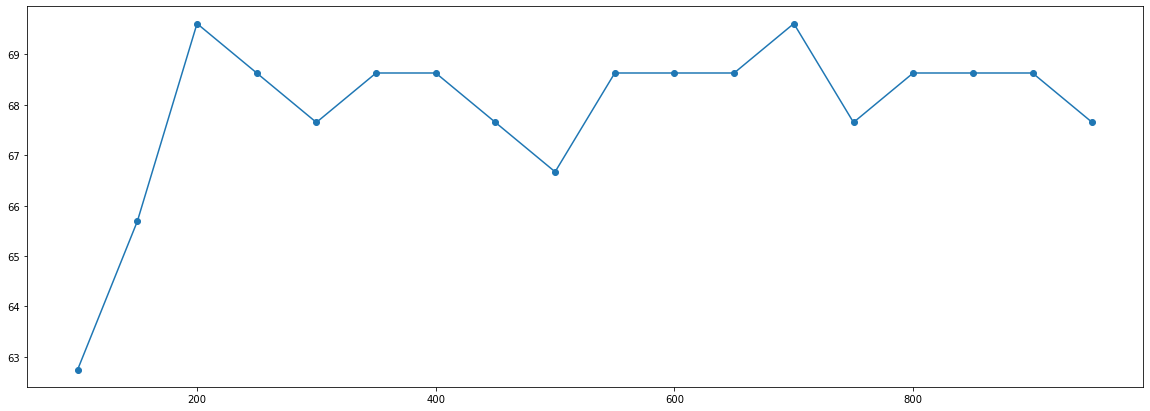

In [89]:
# after 200 eastimators, performance reaches a plateau
plt.figure(figsize=(20,7))
plt.plot(n_estimators, scores)
plt.scatter(n_estimators, scores)
plt.show()

In [90]:
estimator = DecisionTreeClassifier()
bagclf = BaggingClassifier(base_estimator=estimator, 
                           n_estimators=200,
                           random_state=state).fit(X_train, Y_train)

In [91]:
print('accuracy train:', round(bagclf.score(X_train, Y_train)*100, 2))
print('accuracy test:', round(bagclf.score(X_test, Y_test)*100, 2))

accuracy train: 100.0
accuracy test: 69.61


#### Random Forest

In [92]:
randclf = RandomForestClassifier(random_state=state, oob_score=True).fit(X_train,Y_train)

In [93]:
print('accuracy train:', round(randclf.score(X_train, Y_train)*100, 2))
print('accuracy test:', round(randclf.score(X_test, Y_test)*100, 2))

accuracy train: 100.0
accuracy test: 65.69


In [94]:
# test accuracy and out-of-bag score close to each other signify low variance
print('oob score:', round(randclf.oob_score_*100, 2))

oob score: 57.67


In [95]:
# we have high variance random forest classifier above

In [96]:
estimator = RandomForestClassifier(random_state=state)
params = {'n_estimators': n_estimators}
gridsearch = GridSearchCV(estimator=estimator, 
                          param_grid=params, 
                          cv=5).fit(X_train, Y_train)

In [97]:
gridsearch.best_params_

{'n_estimators': 350}

In [98]:
randclf = RandomForestClassifier(n_estimators=350, 
                                 oob_score=True, 
                                 random_state=state).fit(X_train,Y_train)

In [99]:
print('accuracy train:', round(randclf.score(X_train, Y_train)*100, 2))
print('accuracy test:', round(randclf.score(X_test, Y_test)*100, 2))

accuracy train: 100.0
accuracy test: 65.69


In [100]:
print('oob score:', round(randclf.oob_score_*100, 2))

oob score: 59.9


#### Boosting 

In [101]:
# AdaBoost Classifier

In [102]:
adaclf = AdaBoostClassifier(random_state=state).fit(X_train, Y_train)

In [103]:
print('accuracy train:', round(adaclf.score(X_train, Y_train)*100, 2))
print('accuracy test:', round(adaclf.score(X_test, Y_test)*100, 2))

accuracy train: 83.42
accuracy test: 60.78


In [104]:
adaclf1 = AdaBoostClassifier(learning_rate=0.1, 
                             n_estimators=1000,
                             random_state=state).fit(X_train, Y_train)

In [105]:
print('accuracy train:', round(adaclf1.score(X_train, Y_train)*100, 2))
print('accuracy test:', round(adaclf1.score(X_test, Y_test)*100, 2))

accuracy train: 87.13
accuracy test: 61.76


In [106]:
adaclf2 = AdaBoostClassifier(randclf,
                             learning_rate=0.1, 
                             n_estimators=750,
                             random_state=state).fit(X_train, Y_train)

In [107]:
print('accuracy train:', round(adaclf2.score(X_train, Y_train)*100, 2))
print('accuracy test:', round(adaclf2.score(X_test, Y_test)*100, 2))

accuracy train: 100.0
accuracy test: 62.75


In [108]:
# Gradient Boosting Classifier

In [109]:
GBclf = GradientBoostingClassifier(random_state=state).fit(X_train, Y_train)

In [110]:
print('accuracy train:', round(GBclf.score(X_train, Y_train)*100, 2))
print('accuracy test:', round(GBclf.score(X_test, Y_test)*100, 2))

accuracy train: 98.02
accuracy test: 62.75


In [111]:
# GBclf1 = GradientBoostingClassifier(random_state=state)
# lr = np.arange(0.01, 0.1, 0.01)
# n = np.arange(100, 1000, 100)
# depth = np.arange(1,5)
# params = {'learning_rate':lr, 'n_estimators':n, 'max_depth':depth}
# gridsearch = GridSearchCV(estimator=GBclf1, 
#                           param_grid=params, 
#                           cv=5, 
#                           verbose=2, 
#                           n_jobs= -1).fit(X_train, Y_train)

In [112]:
# XGBoost

### 3 types of hyperparameters
- general parameter - overall functioning
- booster parameters - individual booster
- regularisation parameters - alpha and lambda

In [113]:
XGBclf = xgb.XGBClassifier().fit(X_train, Y_train)

In [114]:
print('accuracy train:', round(XGBclf.score(X_train, Y_train)*100, 2))
print('accuracy test:', round(XGBclf.score(X_test, Y_test)*100, 2))

accuracy train: 100.0
accuracy test: 65.69


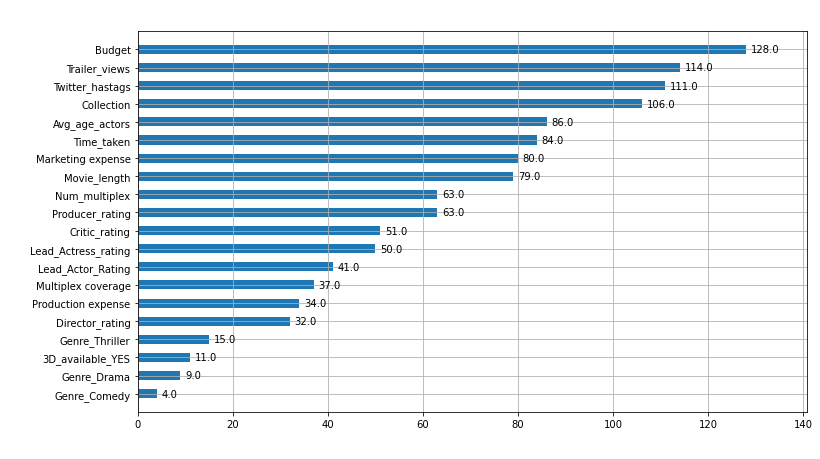

In [115]:
fig, ax = plt.subplots(figsize=(12, 7))
xgb.plot_importance(booster=XGBclf, ax=ax, height=0.5)
ax.set_title("Feature Importances", fontsize=25, color='white')
ax.set_xlabel("F-Score", fontsize=20, color='white')
ax.set_ylabel("Features", fontsize=20, color='white')
plt.show()

In [116]:
XGBclf1 = xgb.XGBClassifier(max_depth=3, 
                            n_estimators=3000,
                            learning_rate=0.01, 
                            n_jobs= -1).fit(X_train, Y_train)

In [117]:
print('accuracy train:', round(XGBclf1.score(X_train, Y_train)*100, 2))
print('accuracy test:', round(XGBclf1.score(X_test, Y_test)*100, 2))

accuracy train: 100.0
accuracy test: 69.61


List of Hyperparameters
* max_depth 
    * more depth leads to higher chances of overfit
    * range generally 2 to 10
* sub_sample
    * random subset of training set for every iteration
    * used for regularisation
    * range 0 to 1
* colsample_bylevel
    * random sub-sample of columns for each level on tree
    * used for regularisation
    * ideal range 0 to 1
* colsample_bynode
    * random sub-sample of columns for each tree
    * used for regularisation
    * range 0 to 1
* min_childweight
    * minimum sum of hessians required for a potential node to split where a hessian is the contribution of a datapoint to loss function
    * prevents overfit
    * any number
    * smaller values would create shorter trees
* gamma
    * minimum loss reduction required for a potential node to split
    * prevents overfit
    * any number
    * higher values would create more conservative tree, would need more improvement to split a node
* reg_lambda
    * L2 regularisation
    * range 0 to 1
* reg_alpha
    * L1 regularisation
    * range 0 to 1
* n_estimators
* learning_rate (eta) 
    * range from 0 to 1